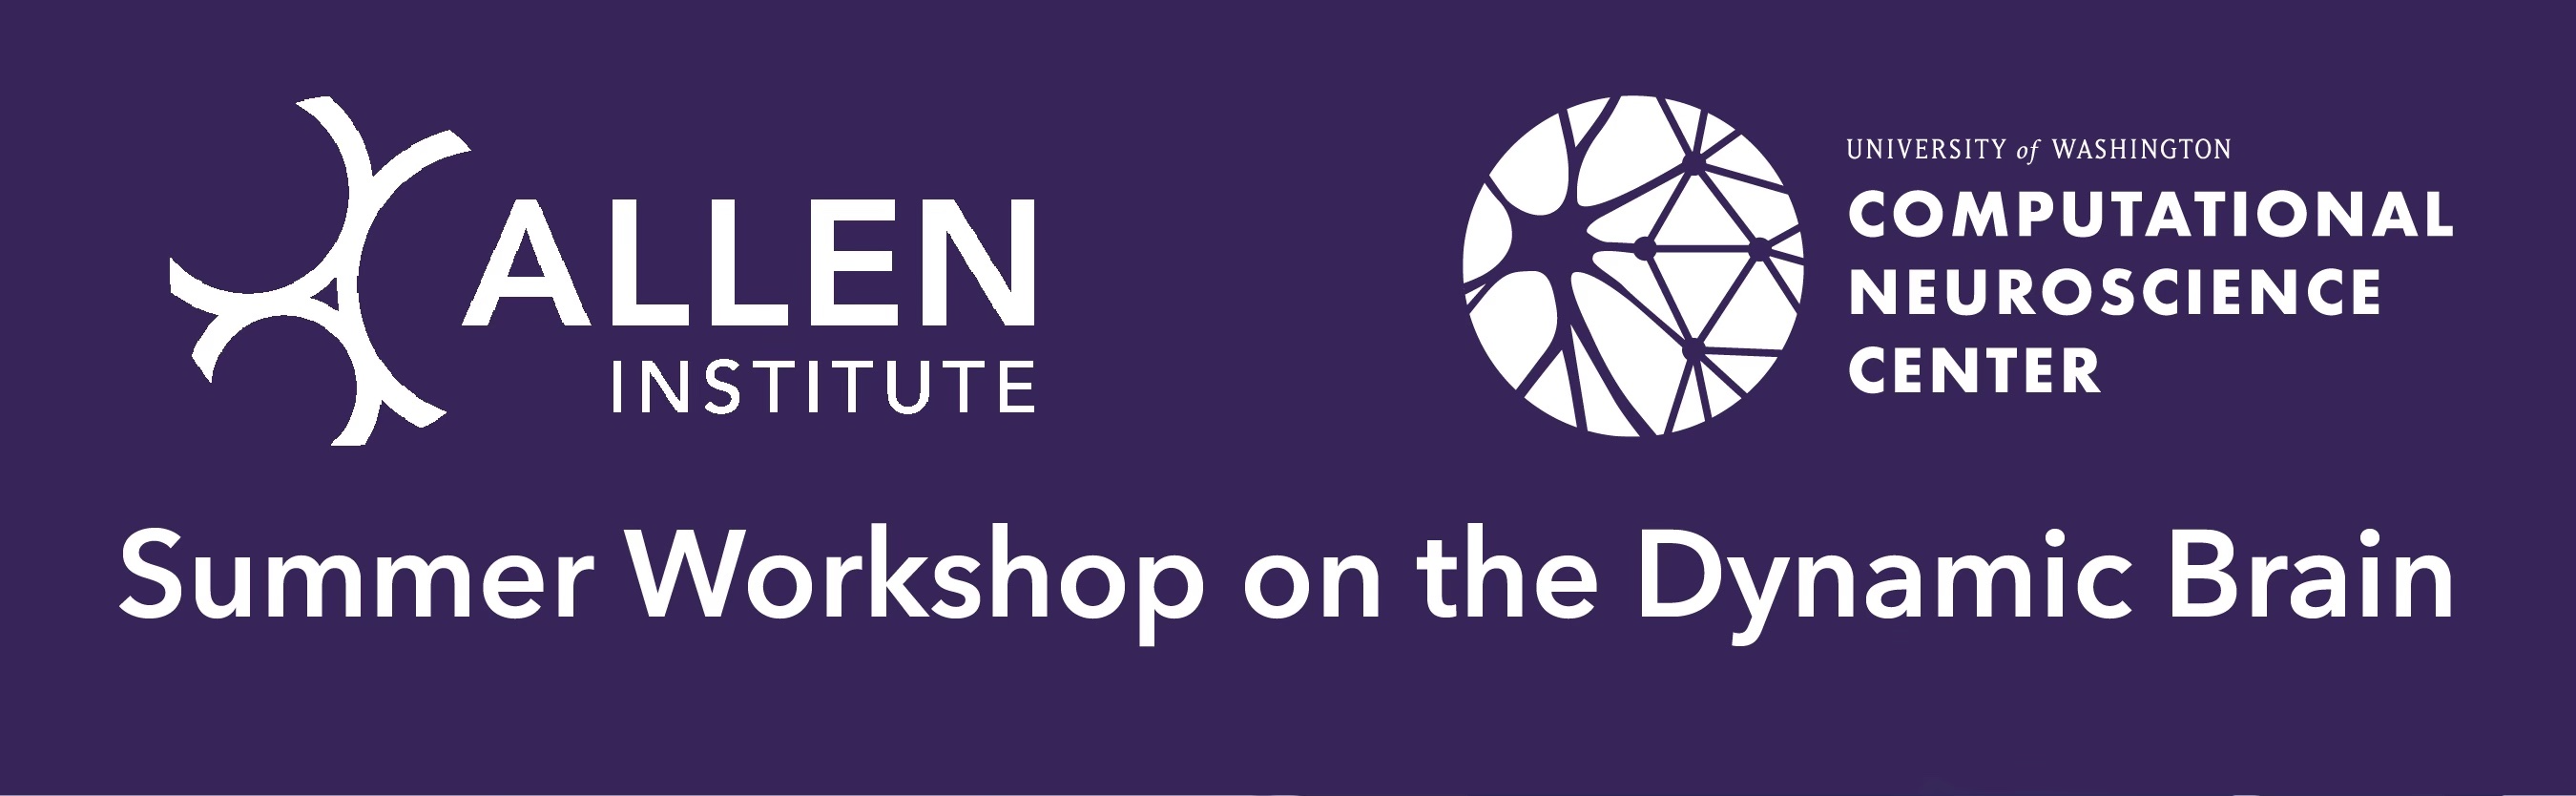

<h1 align="center">DAY 1 Workshop 1 SWDB 2025 </h1> 
<h3 align="center">Monday, August 25, 2025</h3> 
<h3 align="center">Introduction to the SWDB Datasets (AllenSDK)</h3> 

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    
<h2>Objectives</h2>

    
In this workshop, we will briefly introduce the datasets made available for SWDB, walking through how to load, find, and access key data pieces and metadata. After working through the material, you will learn: 
* how to use AllenSDK and pynwb to load and access the data 
* how to search the metadata for information about the datasets and experiments 
* about the features and limitations of each dataset to help you select the right data for your scientific question 


<h3>Data Access: AllenSDK and pynwb</h3>
    
There are 2 Python toolkits we'll use for accessing the SWDB datasets: AllenSDK and pynwb. This workshop is split into two Code Ocean capsules with the corresponding environment setup and attached datasets for each toolkit. Later on, you can use these capsules as templates for your own projects, depending on the dataset you choose. 
    
Here, we'll show how to use the AllenSDK to access the Allen Brain Observatory datasets and metadata, focusing on the Visual Behavior Ophys dataset. 
    
</div>

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Allen Brain Observatory Datasets </h2> 


* **Visual Behavior 2p**
    * **Visual Behavior**
    * Visual Behavior Task1B 
    * Visual Behavior Multiscope 
    * Visual Behavior Multiscope 4 areas x 2d
* Visual Behavior Neuropixels
* Visual Coding 2p 
* Visual Coding Neuropixels 
    
The **Allen Brain Observatory Visual Behavior 2p (Ophys)** dataset used in vivo 2-photon calcium imaging to measure the activity of genetically identified neurons in the visual cortex of mice performing a go/no-go visual change detection task. This dataset can be used to evaluate the influence of experience, expectation, and task engagement on neural coding and dynamics in excitatory and inhibitory cell populations.

<h3>Change Detection Task</h3>
    
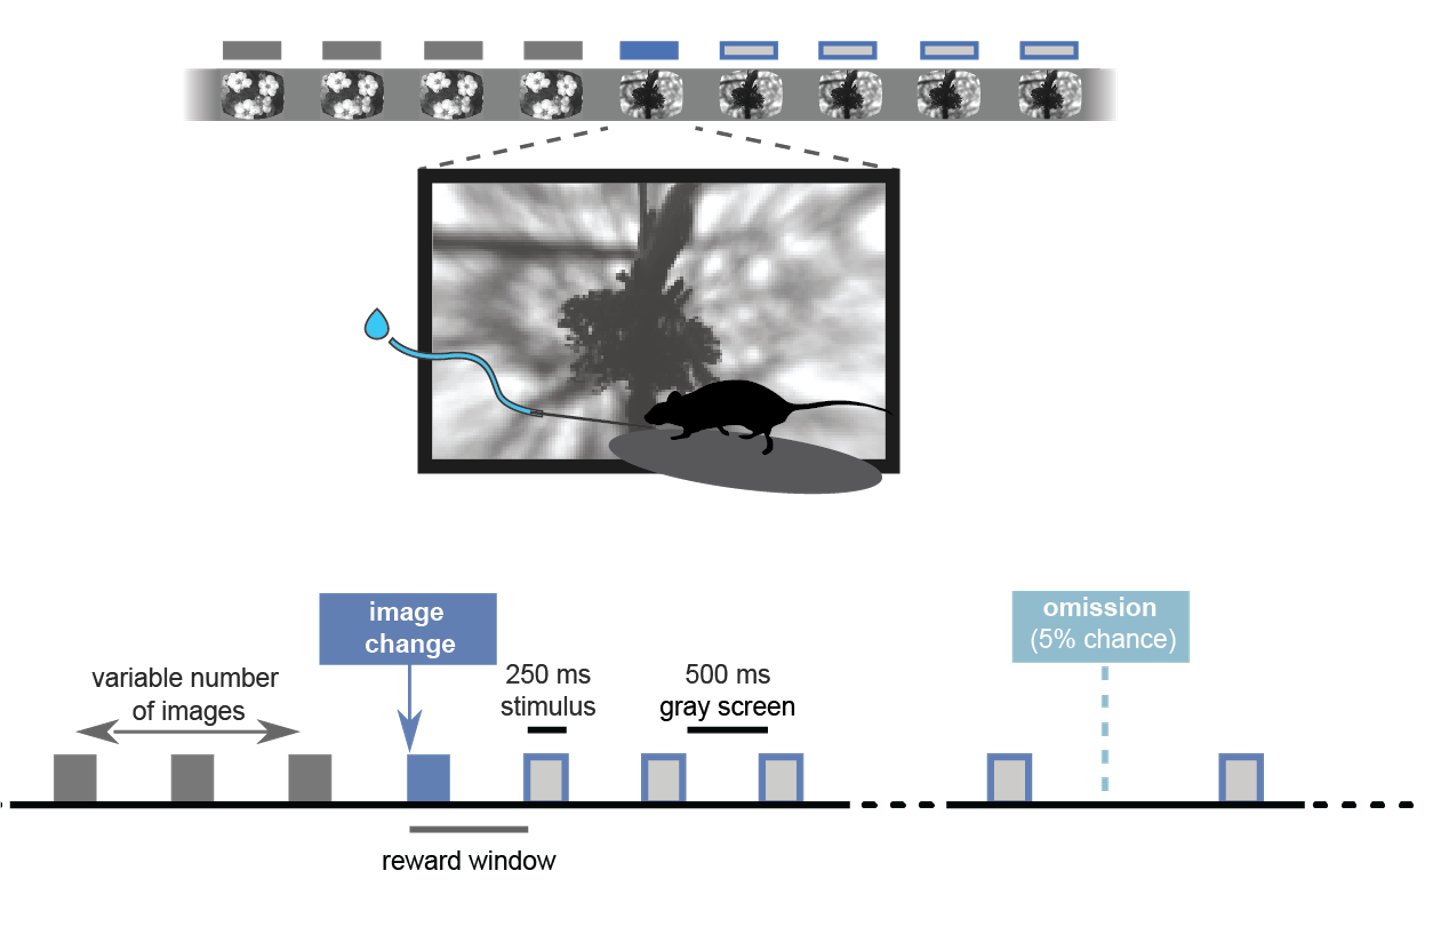

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Summer Workshop on the Dynamic Brain Data Book </h2> 

The databook is a resource for understanding the various dimensions of the datasets, the methods used, and how to access the data. You can find the pages for the Visual Behavior Ophys dataset here: https://allenswdb.github.io/physiology/ophys/visual-behavior/VB-Ophys.html 



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2> Using AllenSDK to load the data </h2> 
Using the Python objects we'll show you below, you can extract information about this dataset such as which genetically defined cell populations were imaged, which session types are available, and how to find the same neurons across multiple sessions. 

The available data for each session includes: 
- Calcium fluorescence traces and deconvolved events representing neural activity
- Average projection images of 2-photon movies to visualize spatial organization of recorded neurons
- Stimulus presentation times, including times of image changes and image omissions
- Running speed and pupil area as measures of arousal and behavioral state
- Licking responses and reward times associated with task performance

</div>

In [1]:
# general imports 
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np 
%matplotlib inline 

import allensdk

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Load the Project Cache</h2> 
    
The code below shows how to use the VisualBehaviorOphysProjectCache class to load metadata tables and explore the features of the dataset. 

In [2]:
# import behavior project cache class to load the data
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

cache_dir = '/root/capsule/data/'

cache = VisualBehaviorOphysProjectCache.from_local_cache(
            cache_dir=cache_dir, use_static_cache=True)

/opt/conda/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/conda/lib/python3.9/site-packages/allensdk/api/cloud_cache/cloud_cache.py:439: MissingLocalManifestWarning: This cache directory appears to contain data files, but it has no record of what those files are. You might want to consider running

NaturalMovieOneCache.construct_local_manifest()

to avoid needlessly downloading duplicates of data files that did not change between data releases. NOTE: running this method will require hashing every data file you have currently downloaded and could be very time consuming.

To avoid this warning in the future, make sure that

/root/capsule/data/resources/_downloaded_data.json

is not deleted between instantiations of this cache
  warnings.warn(msg, MissingLocalManifestWarning)
/opt/conda/lib/python3.9/

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Accessing the Project Metadata</h2>
Instatiating the cache downloads 4 project metadata files: 

1. behavior_session_table.csv
2. ophys_session_table.csv 
3. ophys_experiment_table.csv
4. ophys_cells_table.csv

Each one contains a table of information related to its file name. If you're using the AllenSDK, you don't have to worry about how these files are formatted. Instead, you'll load the relevant data using a specific accessor method: `get_behavior_session_table`, `get_ophys_session_table`, `get_ophys_experiment_table`, `get_ophys_cells_table`. 

Each function returns a pandas DataFrame with a row for each item and a column for each metric. 

If you are analyzing data without the AllenSDK, you can load the data using your CSV file reader of choice. However, please be aware the columns in the original file do not necessarily match what's returned by the AllenSDK, which may combine information from multiple files to produce the final DataFrame. 
    

**Resources:** Check the [Data Book](https://allenswdb.github.io/physiology/ophys/visual-behavior/VBO-Dataset.html#vbo-metadata-tables) to learn more about the different tables, including what all of the columns mean. 


<h2>Sessions (Behavior and Ophys) vs Experiments </h2>  
    
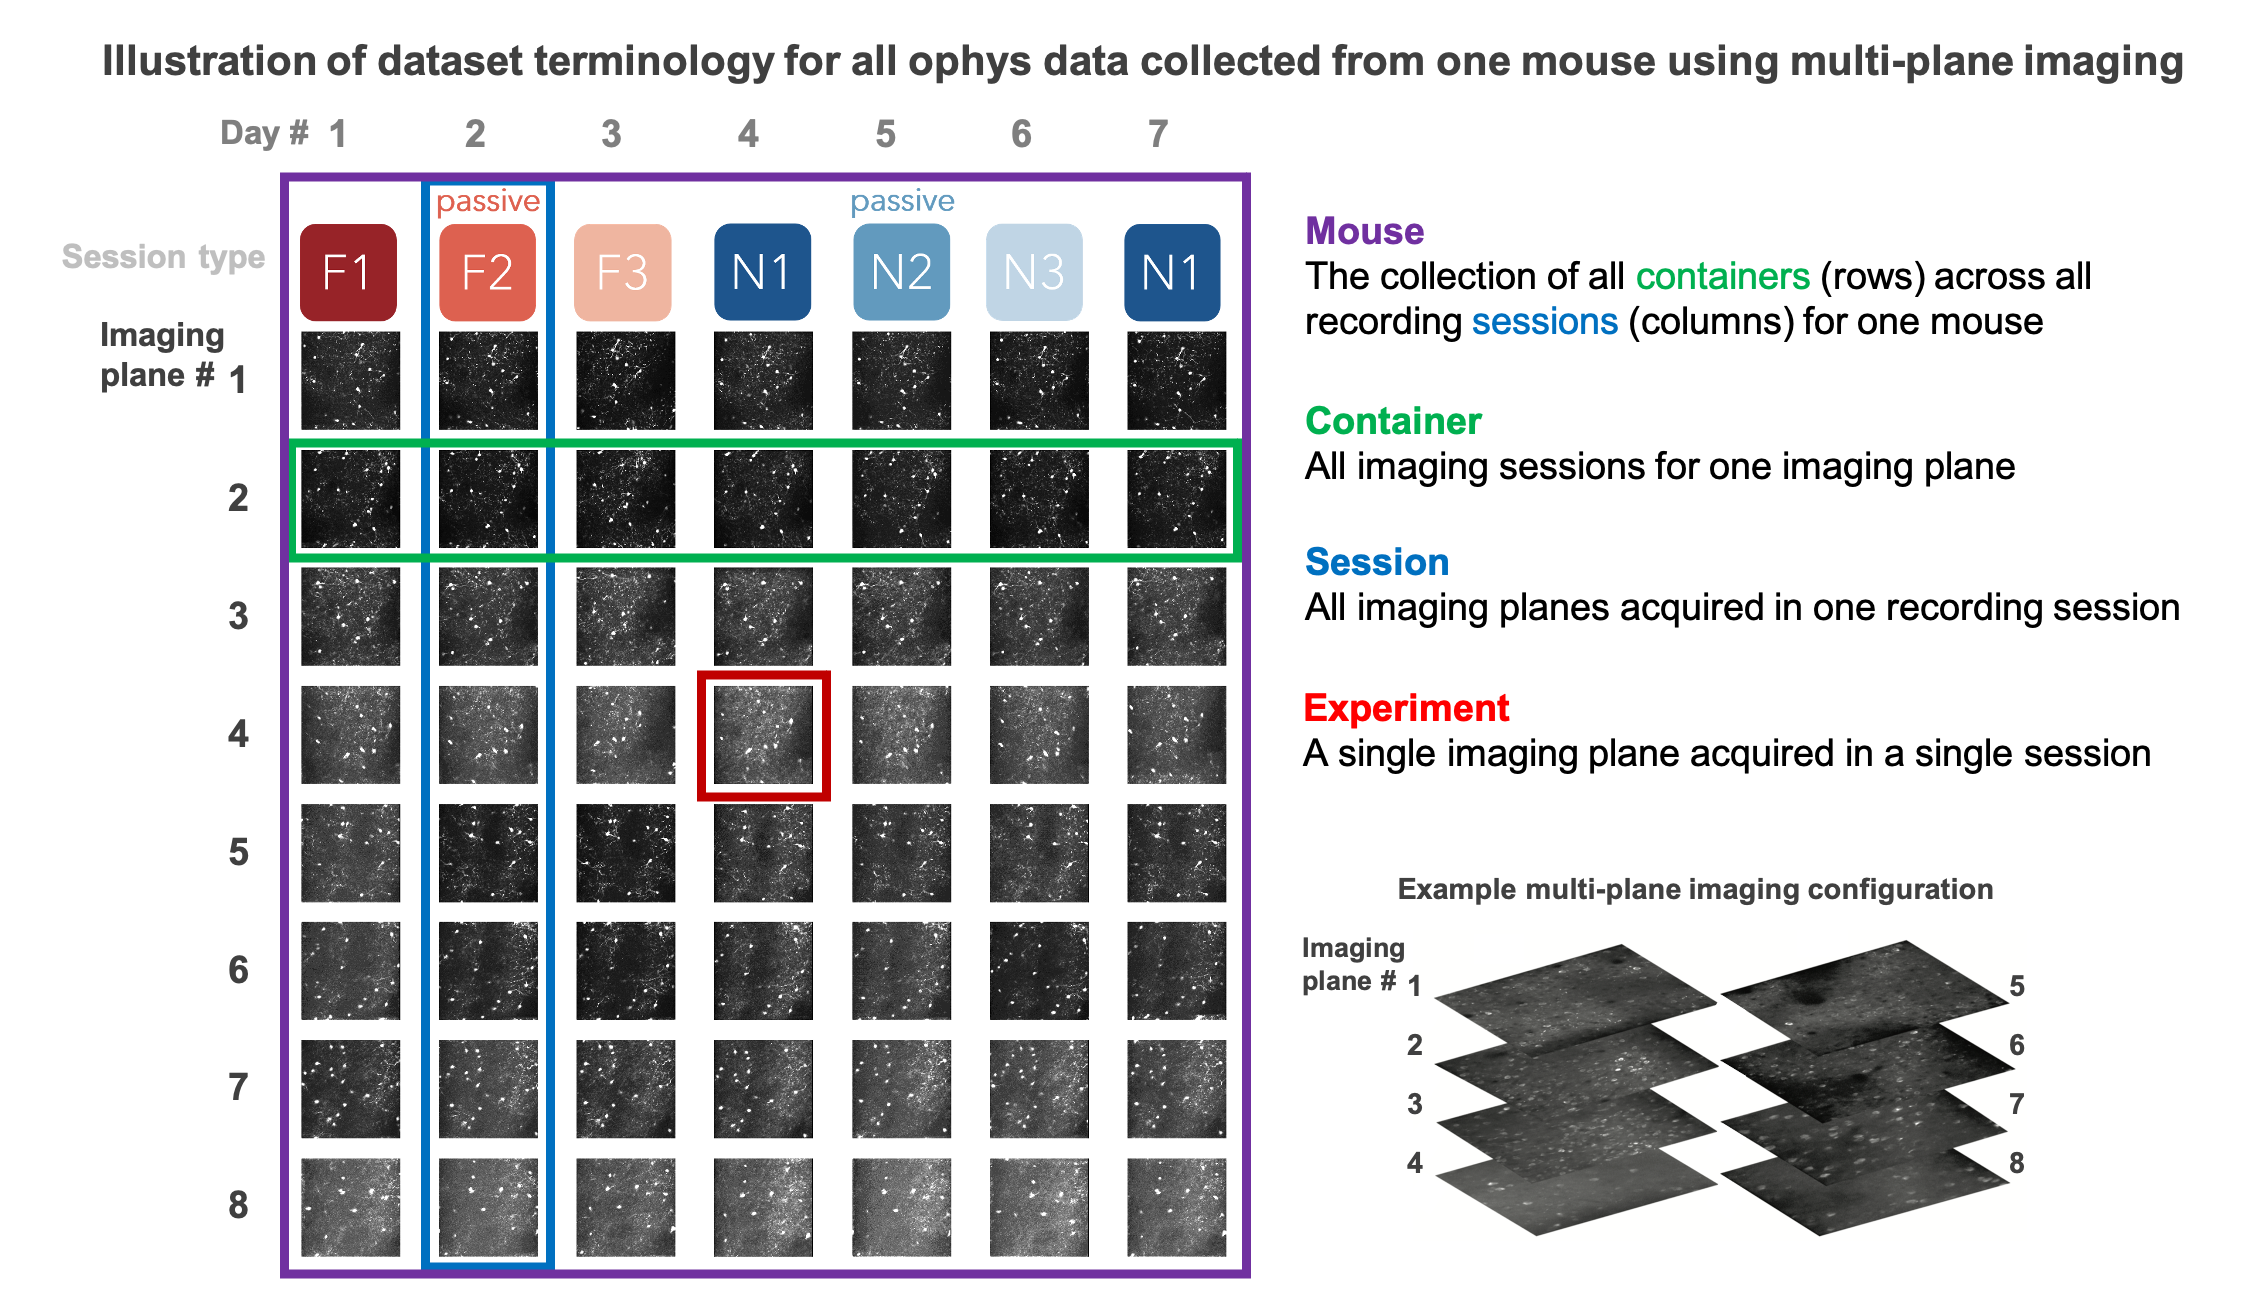


In [3]:
# Instantiate the project metadata using the AllenSDK 

behavior_sessions = cache.get_behavior_session_table()
ophys_sessions = cache.get_ophys_session_table()
ophys_experiments = cache.get_ophys_experiment_table()
ophys_cells = cache.get_ophys_cells_table()  

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h2>Visual Behavior Ophys Projects</h2>  

The Visual Behavior Ophys dataset encapsulates 4 different projects that use different iterations of the behavior paradigm and recording set-up. 
    
The `behavior_sessions`, `ophys_sessions`, `ophys_experiments`, and `ophys_cells_table` DataFrames aggregate metadata across the projects. We can use the `project_code` column in the `behavior_sessions`, `ophys_session`, and `ophys_experiments` to filter for sessions specific to a project of interest. 

In [55]:
behavior_sessions.project_code.unique().tolist()

['VisualBehaviorMultiscope',
 'VisualBehaviorTask1B',
 'VisualBehavior',
 'VisualBehaviorMultiscope4areasx2d']

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    <h2>Load the dataset</h2>
    
Let's load the data for the **Visual Behavior** project and plot the neural activity, stimulus, and behavior information for a select session. 


In [6]:
# Filter DataFrames for Visual Behavior project 

project = 'VisualBehavior' 

filtered_behavior_sessions = behavior_sessions[behavior_sessions.project_code == project] 
filtered_ophys_sessions = ophys_sessions[ophys_sessions.project_code == project] 
filtered_ophys_experiments = ophys_experiments[ophys_experiments.project_code == project] 

# Filter ophys cells table based on ophys experiment id 
filtered_ophys_cells = ophys_cells[ophys_cells.ophys_experiment_id.isin(filtered_ophys_experiments.index.tolist())]


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Ophys Experiment Table</h2>  

The `ophys_experiments` DataFrame contains all ophys data that is available for analysis, organized by the `ophys_experiment_id` associated with a single imaging plane in a single session. 
    
This DataFrame contains information about the subject, the sessions, the behavior, and the imaging planes (`imaging_depth` and `targeted_structure`) 

In [52]:
filtered_ophys_experiments.head()

,behavior_session_id,ophys_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,...,passive,experience_level,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,date_of_acquisition,equipment_name,published_at,isi_experiment_id,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
792815735,792680306,792619807,791352433,412036,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,19,1,2018-12-10 13:37:29.143000+00:00,CAM2P.4,2021-03-25,754116317,53
795073741,794968300,794918442,791352433,412036,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Familiar,0,21,3,2018-12-13 13:33:06.390000+00:00,CAM2P.4,2021-03-25,754116317,54
795953296,795742990,795625712,791352433,412036,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Novel 1,0,0,4,2018-12-14 12:37:49.365000+00:00,CAM2P.4,2021-03-25,754116317,55
796108483,796052844,796044280,791352433,412036,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,True,Novel >1,0,1,5,2018-12-15 13:11:14.373000+00:00,CAM2P.4,2021-03-25,754116317,56
796308505,796251270,796236521,791352433,412036,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,...,False,Novel >1,0,2,6,2018-12-16 13:15:04.328000+00:00,CAM2P.4,2021-03-25,754116317,57


In [57]:
filtered_ophys_experiments.columns

Index(['behavior_session_id', 'ophys_session_id', 'ophys_container_id',
       'mouse_id', 'indicator', 'full_genotype', 'driver_line', 'cre_line',
       'reporter_line', 'sex', 'age_in_days', 'imaging_depth',
       'targeted_structure', 'targeted_imaging_depth', 'imaging_plane_group',
       'project_code', 'session_type', 'session_number', 'image_set',
       'behavior_type', 'passive', 'experience_level',
       'prior_exposures_to_session_type', 'prior_exposures_to_image_set',
       'prior_exposures_to_omissions', 'date_of_acquisition', 'equipment_name',
       'published_at', 'isi_experiment_id', 'file_id'],
      dtype='object')

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** How many mice were used in this dataset?
</div>

In [51]:
len(filtered_ophys_experiments.mouse_id.unique())

37

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** How many sessions? 
</div>

In [53]:
len(filtered_ophys_experiments.ophys_session_id.unique())

239

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** What transgenic lines were used in this dataset? What cell types do these lines refer to? 
    
For help, refer to the list of [transgenic lines](https://allenswdb.github.io/background/transgenic-tools.html) in the Data Book 
</div>

In [54]:
filtered_ophys_experiments.full_genotype.unique()

array(['Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
       'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-GCaMP6s)/wt',
       'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/wt',
       'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt'], dtype=object)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
    
**Exercise:** What structures were targeted? 

In [10]:
filtered_ophys_experiments.targeted_structure.unique().tolist()

['VISp']

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** What types of behaviors happened during these sessions? 
</div>

In [66]:
filtered_ophys_experiments.behavior_type.unique().tolist()

['active_behavior', 'passive_viewing']

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Ophys Sessions Table</h2>  
    
The `ophys_experiments` DataFrame contains the same columns and information as the `ophys_sessions` DataFrame, but is organized by experiment (single imaging plane in a single session) while the other is organized by session (all imaging planes acquired in a recording session). 

In [64]:
filtered_ophys_sessions.head()

,behavior_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,age_in_days,...,behavior_type,experience_level,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,date_of_acquisition,equipment_name,num_depths_per_area,ophys_experiment_id,num_targeted_structures
ophys_session_id,,,,,,,,,,,,,,,,,,,,,
792619807,792680306,[791352433],412036,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,148,...,active_behavior,Familiar,0,19,1,2018-12-10 13:37:29.143000+00:00,CAM2P.4,1,[792815735],1
794918442,794968300,[791352433],412036,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,151,...,active_behavior,Familiar,0,21,3,2018-12-13 13:33:06.390000+00:00,CAM2P.4,1,[795073741],1
795625712,795742990,[791352433],412036,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,152,...,active_behavior,Novel 1,0,0,4,2018-12-14 12:37:49.365000+00:00,CAM2P.4,1,[795953296],1
796044280,796052844,[791352433],412036,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,153,...,passive_viewing,Novel >1,0,1,5,2018-12-15 13:11:14.373000+00:00,CAM2P.4,1,[796108483],1
796236521,796251270,[791352433],412036,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,154,...,active_behavior,Novel >1,0,2,6,2018-12-16 13:15:04.328000+00:00,CAM2P.4,1,[796308505],1


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Behavior sessions table</h2>  

The `behavior_sessions` DataFrame provides a high-level overview for behavior sessions in the Visual Behavior dataset. The index column (behavior_session_id is a unique ID, which serves as a key to access behavior data for each session. 
    
The `ophys_experiments` DataFrame encapsulates the same information from the `behavior_sessions` DataFrame for all imaging sessions with behavior. The `behavior_sessions` DataFrame contains information on the behavior sessions that occurred during the training period prior to imaging. 

In [65]:
filtered_behavior_sessions.head()

,ophys_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,age_in_days,...,num_targeted_structures,false_alarm_trial_count,file_id,correct_reject_trial_count,miss_trial_count,trial_count,catch_trial_count,go_trial_count,engaged_trial_count,hit_trial_count
behavior_session_id,,,,,,,,,,,,,,,,,,,,,
760808911,<NA>,NaN,412036,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,82,...,<NA>,0,2084,0,0,109,0,0,99,0
761294708,<NA>,NaN,412036,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,85,...,<NA>,10,2085,20,162,913,30,216,91,54
761730617,<NA>,NaN,412036,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,86,...,<NA>,5,2086,12,107,964,17,159,64,52
762067130,<NA>,NaN,412036,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,87,...,<NA>,5,2087,14,76,1087,19,134,101,58
762418364,<NA>,NaN,412036,GCaMP6f,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Vip-IRES-Cre],Vip-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),F,88,...,<NA>,5,2088,17,180,775,22,226,1,46


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h2>Ophys Cells Table</h2>  

The same population of neurons were targeted across multiple recording sessions, allowing us to track the activity of single neurons across days. The imaging planes across sessions were registered so that we could identify the same neuron across recording sessions. Each neuron was given a number id: cell_roi_id which can be found in the `ophys_cells_table` along with other unique identifiers. 
    
The ids in this DataFrame can be used in combination with the ophys_experiments DataFrame to shape the dataset in different ways.  
    
`cell_roi_id` = ID of the cell in a specific session (local) 
`ophys_experiment_id` = ID for each experiment (single imaging plane in a single session) 
`cell_specimen_id` = ID of a cell tracked across a container (global, across imaging sessions)
    
Each cell in an experiment is given a unique `cell_roi_id`. If those cells are tracked across several experiments, or a session, then that cell is given a `cell_specimen_id`. 


In [12]:
filtered_ophys_cells.head()

,ophys_experiment_id,cell_specimen_id
cell_roi_id,,
1080884343,775614751,1086496928
1080884173,775614751,1086496914
1080883843,775614751,1086496838
1080886674,775614751,1086491756
1080885658,775614751,1086491699


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** How many unique cells were recorded in this dataset? 
</div>

In [63]:
print(f"Unique cells: {len(filtered_ophys_cells.cell_specimen_id.unique())}\n")

Unique cells: 16181



<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Select an experiment and load the data</h4>       

We can use the `get_ophys_experiment()` method to return a python object containing all the data and metadata for an experiment using the `ophys_experiment_id`. We can select an experiment of interest by filtering the `ophys_experiments` table based on specific experimental conditions. 

Let's look at the neural activity from Somatostatin neurons, an inhibitory cell type, and focus on sessions in which novel images were shown. We need to filter by: **driver line** (Sst-IRES-Cre) and **prior_exposures_to_image_set** (0, indicating this is a novel presentation) 
    

In [14]:
selected_experiment_table = filtered_ophys_experiments[(filtered_ophys_experiments.cre_line=='Sst-IRES-Cre') &
                        (filtered_ophys_experiments.prior_exposures_to_image_set==0)]

print('Number of experiments: {}'.format(len(selected_experiment_table)))
selected_experiment_table

Number of experiments: 6


,behavior_session_id,ophys_session_id,ophys_container_id,mouse_id,indicator,full_genotype,driver_line,cre_line,reporter_line,sex,...,passive,experience_level,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,date_of_acquisition,equipment_name,published_at,isi_experiment_id,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
1051423446,1051341605,1051327401,1049224697,533527,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),M,...,False,Novel 1,0,0,4,2020-09-18 09:56:47.898000+00:00,CAM2P.3,2021-03-25,1038936025,461
1008318518,1008030870,1008005573,1006071814,495789,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),M,...,False,Novel 1,0,0,3,2020-02-18 09:11:02.280000+00:00,CAM2P.3,2021-03-25,985894742,552
1083070132,1083001647,1082988691,1080284671,546819,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),M,...,False,Novel 1,0,0,4,2021-02-10 12:53:23.145000+00:00,CAM2P.3,2021-08-12,1056468289,737
1044095203,1044011835,1043989533,1039579201,524274,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),M,...,False,Novel 1,0,0,5,2020-08-18 12:41:20.112000+00:00,CAM2P.4,2021-03-25,1027448106,904
1085000574,1084914230,1084882685,1081683701,549976,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),M,...,False,Novel 1,0,0,4,2021-02-18 09:38:44.980000+00:00,CAM2P.4,2021-08-12,1059649397,1728
965228792,965034185,964912357,957024596,467302,GCaMP6f,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Sst-IRES-Cre],Sst-IRES-Cre,Ai148(TIT2L-GC6f-ICL-tTA2),M,...,False,Novel 1,0,0,6,2019-10-10 11:40:43.640000+00:00,CAM2P.5,2021-03-25,894191516,1876


In [15]:
# select first experiment from the table to look at in more detail 
ophys_experiment_id = selected_experiment_table.index[0]

# load the data for this ophys experiment from the cache
ophys_experiment = cache.get_behavior_ophys_experiment(ophys_experiment_id)

/opt/conda/lib/python3.9/site-packages/hdmf/spec/namespace.py:583: UserWarning: Ignoring the following cached namespace(s) because another version is already loaded:
core - cached version: 2.6.0-alpha, loaded version: 2.7.0
The loaded extension(s) may not be compatible with the cached extension(s) in the file. Please check the extension documentation and ignore this warning if these versions are compatible.
  self.warn_for_ignored_namespaces(ignored_namespaces)


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Inspect the experiment object attributes</h4>
Using the `list_data_attributes_and_methods()` method will show us all of the attributes of the `ophys_experiment` object. 

In [16]:
ophys_experiment.list_data_attributes_and_methods()

['average_projection',
 'behavior_session_id',
 'cell_specimen_table',
 'corrected_fluorescence_traces',
 'demixed_traces',
 'dff_traces',
 'events',
 'eye_tracking',
 'eye_tracking_rig_geometry',
 'get_cell_specimen_ids',
 'get_cell_specimen_indices',
 'get_dff_traces',
 'get_performance_metrics',
 'get_reward_rate',
 'get_rolling_performance_df',
 'get_segmentation_mask_image',
 'licks',
 'max_projection',
 'metadata',
 'motion_correction',
 'neuropil_traces',
 'ophys_experiment_id',
 'ophys_session_id',
 'ophys_timestamps',
 'raw_running_speed',
 'rewards',
 'roi_masks',
 'running_speed',
 'segmentation_mask_image',
 'stimulus_presentations',
 'stimulus_templates',
 'stimulus_timestamps',
 'task_parameters',
 'trials',
 'update_targeted_imaging_depth']

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Experiment Metadata</h4>
 
The metadata attribute will output metadata for this specific experiment. 

In [17]:
ophys_experiment.metadata

{'equipment_name': 'CAM2P.3',
 'sex': 'M',
 'age_in_days': 124,
 'stimulus_frame_rate': 60.0,
 'session_type': 'OPHYS_4_images_B',
 'date_of_acquisition': datetime.datetime(2020, 9, 18, 9, 56, 47, 898000, tzinfo=tzutc()),
 'reporter_line': 'Ai148(TIT2L-GC6f-ICL-tTA2)',
 'cre_line': 'Sst-IRES-Cre',
 'behavior_session_uuid': UUID('1fd7d62f-2e6c-47a4-a29b-978f2bed9cec'),
 'driver_line': ['Sst-IRES-Cre'],
 'mouse_id': '533527',
 'project_code': 'VisualBehavior',
 'full_genotype': 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
 'behavior_session_id': 1051341605,
 'indicator': 'GCaMP6f',
 'emission_lambda': 520.0,
 'excitation_lambda': 910.0,
 'ophys_container_id': 1049224697,
 'field_of_view_height': 512,
 'field_of_view_width': 452,
 'imaging_depth': 275,
 'targeted_imaging_depth': 275,
 'imaging_plane_group': None,
 'imaging_plane_group_count': 0,
 'ophys_experiment_id': 1051423446,
 'ophys_frame_rate': 31.0,
 'ophys_session_id': 1051327401,
 'targeted_structure': 'VISp'}

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** What is the ophys sampling rate? 

In [68]:
print(f"Sampling rate: {ophys_experiment.metadata['ophys_frame_rate']}")

Sampling rate: 31.0


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    <h4>Segmented ROIs</h4>
    
ROIs of the neuron cell bodies are segmented from the 2-photon movies and represented as segmentation masks. We can look at the average projection of the experiment and the segmented masks to assess the segmentation. 

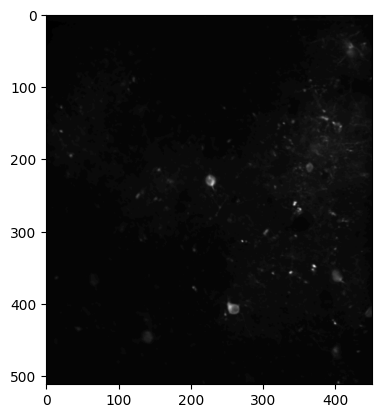

In [20]:
plt.imshow(ophys_experiment.average_projection, cmap='gray')

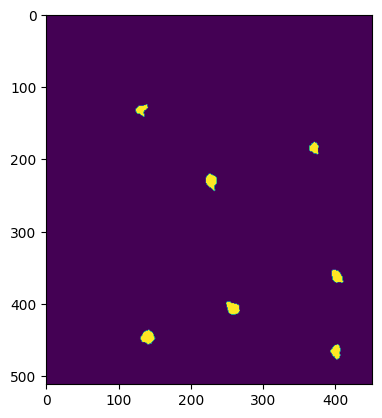

In [21]:
plt.imshow(ophys_experiment.segmentation_mask_image)

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

We can access the segmented ROI masks through the `cell_specimen_table`, which contains metadata about each ROI mask and the masks themselves, a sparse HxW boolean array. 

In [70]:
ophys_experiment.cell_specimen_table.head()

,cell_roi_id,height,mask_image_plane,max_correction_down,max_correction_left,max_correction_right,max_correction_up,valid_roi,width,x,y,roi_mask
cell_specimen_id,,,,,,,,,,,,
1086611102,1080641736,17,0,8.0,22.0,11.0,6.0,True,17,124,125,"[[False, False, False, False, False, False, Fa..."
1086611700,1080641746,18,0,8.0,22.0,11.0,6.0,True,16,395,354,"[[False, False, False, False, False, False, Fa..."
1086611364,1080641750,24,0,8.0,22.0,11.0,6.0,True,15,221,221,"[[False, False, False, False, False, False, Fa..."
1086611480,1080641753,17,0,8.0,22.0,11.0,6.0,True,13,364,177,"[[False, False, False, False, False, False, Fa..."
1086612178,1080641759,18,0,8.0,22.0,11.0,6.0,True,19,249,398,"[[False, False, False, False, False, False, Fa..."


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>DF/F</h4>
After ROIs are segmented, the average fluorescence value is calculated for each ROI then baseline subtracted and normalized to yield `dff_traces`. These are the cell activity traces typically used for analysis.
  
    
`dff_traces` is organized by both cell_specimen_id and cell_roi_id.

In [71]:
# Get normalized fluorescence traces 

dff_traces = ophys_experiment.dff_traces
dff_traces.head()

,cell_roi_id,dff
cell_specimen_id,,
1086611102,1080641736,"[0.1506316214799881, 0.08875097334384918, 0.13..."
1086611700,1080641746,"[0.2113184630870819, 0.3112851679325104, 0.246..."
1086611364,1080641750,"[0.22939619421958923, 0.16880697011947632, 0.1..."
1086611480,1080641753,"[0.4773722290992737, 0.6015625596046448, 0.231..."
1086612178,1080641759,"[0.28374695777893066, 0.4014606177806854, 0.37..."


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

<h4>Events</h4>
    
Events are computed for each cell as described in [Giovannucci et al. 2019](https://pubmed.ncbi.nlm.nih.gov/30652683/). The magnitude of events approximates the firing rate of neurons with the resolution of ~200ms. The biggest advantage of using events over dff traces is they exclude prolonged calcium transients that may contaminate neural responses to subsequent stimuli. You can also use `filtered_events`, which are events convolved with a filter created using `stats.halfnorm` method to generate a more continuous trace of activity

In [23]:
# Get deconvolved events 
events = ophys_experiment.events 
events.head()

,cell_roi_id,events,filtered_events,lambda,noise_std
cell_specimen_id,,,,,
1086611102,1080641736,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0513,0.057753
1086611700,1080641746,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0584,0.061786
1086611364,1080641750,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0591,0.062072
1086611480,1080641753,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0704,0.067773
1086612178,1080641759,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0626,0.064629


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
    <h4>Timestamps</h4>
The last piece of data we need to plot the neural activity traces are the timestamps, measured in seconds. 

In [24]:
# Get ophys timestamps 
ophys_timestamps = ophys_experiment.ophys_timestamps
ophys_timestamps 

array([2.23630000e+00, 2.26860000e+00, 2.30090000e+00, ...,
       4.52949636e+03, 4.52952868e+03, 4.52956100e+03])

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** How long is a session? 

In [25]:
# Get the last timestamp ophys_timestamps (in s) and divide by 60 to get minutes  

print(f"{ophys_timestamps[-1]/60} minutes")

75.49268333333333 minutes


<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Plot Neural Activity Traces</h4>
The last piece of data we need to plot the neural activity traces are the timestamps, measured in seconds. 

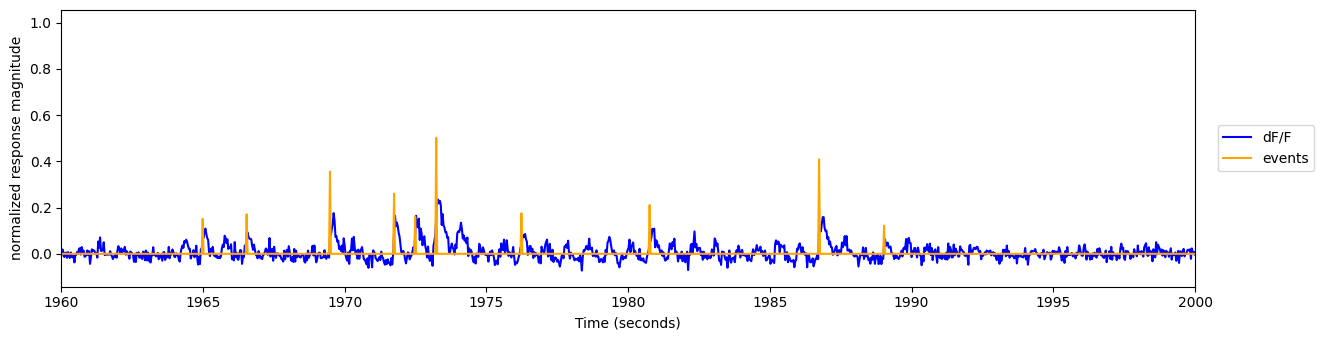

In [74]:
# Plot dF/F and events for one cell 
# Note that we normalize the continuous traces 
roi = 2
initial_time = 1960 
final_time = 2000

# same width as before, height = half of original to match one subplot
fig, ax = plt.subplots(figsize=(15, 3.5))

# df/F and events with stimulus presentations 
ax.plot(
    ophys_timestamps, 
    dff_traces.iloc[roi]['dff'] / dff_traces.iloc[roi]['dff'].max(), 
    color='blue', label='dF/F'
)
ax.plot(
    ophys_timestamps, 
    events.iloc[roi]['events'] / events.iloc[roi]['events'].max(),
    color='orange', label='events'
)

# legend outside to the right
ax.legend(
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0
)

ax.set_ylabel('normalized response magnitude')
ax.set_xlabel('Time (seconds)')
ax.set_xlim([initial_time, final_time])

plt.tight_layout()
plt.subplots_adjust(right=0.8)  # make space for legend
plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Plot neural activity alongside stimuli</h4>

The stimulus presentations table contains one entry for each visual stimulus that was presented during the session, along with important metadata about the stimulus. 

In [27]:
stimulus_table = ophys_experiment.stimulus_presentations
stimulus_table.head()

,stimulus_block,stimulus_block_name,image_index,image_name,movie_frame_index,duration,start_time,end_time,start_frame,end_frame,is_change,is_image_novel,omitted,movie_repeat,flashes_since_change,trials_id,active,is_sham_change,stimulus_name
stimulus_presentations_id,,,,,,,,,,,,,,,,,,,
0,0,initial_gray_screen_5min,-99,NaN,-99,309.576422,0.000000,309.576422,0,17983,False,<NA>,<NA>,-99,0,-99,False,False,spontaneous
1,1,change_detection_behavior,0,im000,-99,0.250170,309.576422,309.826592,17983,17998,False,True,False,-99,1,0,True,False,Natural_Images_Lum_Matched_set_ophys_6_2017
2,1,change_detection_behavior,0,im000,-99,0.250250,310.326972,310.577222,18028,18043,False,True,False,-99,2,0,True,False,Natural_Images_Lum_Matched_set_ophys_6_2017
3,1,change_detection_behavior,0,im000,-99,0.250080,311.077742,311.327822,18073,18088,False,True,False,-99,3,0,True,False,Natural_Images_Lum_Matched_set_ophys_6_2017
4,1,change_detection_behavior,0,im000,-99,0.250160,311.828282,312.078442,18118,18133,False,True,False,-99,4,0,True,False,Natural_Images_Lum_Matched_set_ophys_6_2017


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Exercise:** What are the unique stimulus blocks presented in this dataset? What are the unique stimuli? 

In [28]:
stimulus_table.stimulus_block_name.unique().tolist()

['initial_gray_screen_5min',
 'change_detection_behavior',
 'post_behavior_gray_screen_5min',
 'natural_movie_one']

In [29]:
stimulus_table.stimulus_name.unique().tolist()

['spontaneous',
 'Natural_Images_Lum_Matched_set_ophys_6_2017',
 'natural_movie_one']

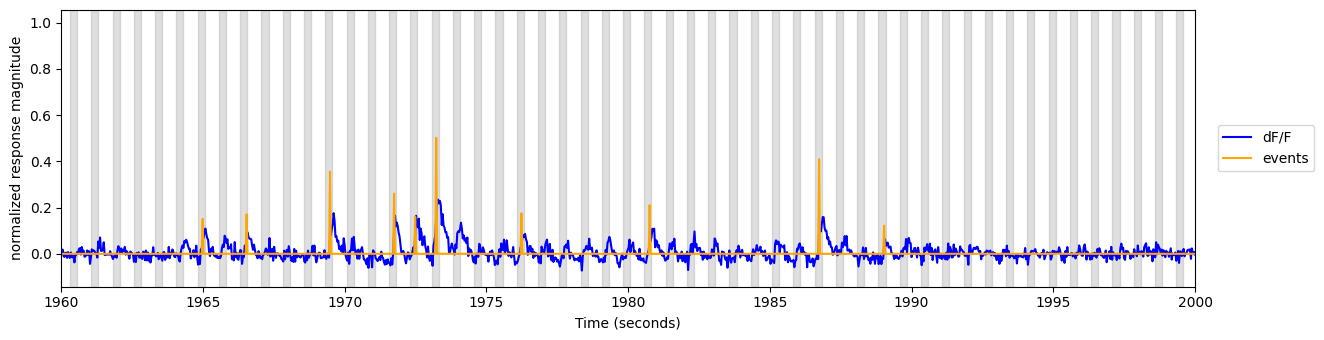

In [76]:
# Plot dF/F and events for one cell with stimulus presentations
roi = 2
initial_time = 1960 
final_time = 2000

fig, ax = plt.subplots(figsize=(15, 3.5))

# df/F and events with stimulus presentations 
ax.plot(
    ophys_timestamps, 
    dff_traces.iloc[roi]['dff'] / dff_traces.iloc[roi]['dff'].max(), 
    color='blue', label='dF/F'
)
ax.plot(
    ophys_timestamps, 
    events.iloc[roi]['events'] / events.iloc[roi]['events'].max(),
    color='orange', label='events'
)

# shaded stimulus spans
for idx, stimulus in stimulus_table.iterrows():
    ax.axvspan(stimulus['start_time'], stimulus['end_time'], color='gray', alpha=0.25)

ax.set_ylabel('normalized response magnitude')
ax.set_xlabel('Time (seconds)')
ax.set_xlim([initial_time, final_time])

# legend outside to the right
ax.legend(
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0
)

plt.tight_layout()
plt.subplots_adjust(right=0.8)  # make space for legend
plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">
<h4>Plot neural activity with stimuli and behavior</h4>
    
There are 4 behavior modalities collected alongside the 2p images: licks, rewards, running speed, and eye tracking. 
Use `?` to find more information about each modality. 

In [31]:
?ophys_experiment.licks

Type:        property
String form: <property object at 0x7fa7648bf180>
Docstring:  
A dataframe containing lick timestmaps and frames, sampled
at 60 Hz.

NOTE: For BehaviorSessions, returned timestamps are not
aligned to external 'synchronization' reference timestamps.
Synchronized timestamps are only available for
BehaviorOphysExperiments.

Returns
-------
np.ndarray
    A dataframe containing lick timestamps.
    dataframe columns:
        timestamps: (float)
            time of lick, in seconds
        frame: (int)
            frame of lick

In [32]:
ophys_experiment.licks.head()

,timestamps,frame
0,110.12602,6030
1,285.31869,16530
2,314.09232,18255
3,315.69354,18351
4,316.07741,18374


In [33]:
?ophys_experiment.rewards

Type:        property
String form: <property object at 0x7fa7648bf270>
Docstring:  
Retrieves rewards from data file saved at the end of the
behavior session.

NOTE: For BehaviorSessions, returned timestamps are not
aligned to external 'synchronization' reference timestamps.
Synchronized timestamps are only available for
BehaviorOphysExperiments.

Returns
-------
pd.DataFrame
    A dataframe containing timestamps of delivered rewards.
    Timestamps are sampled at 60Hz.

    dataframe columns:
        volume: (float)
            volume of individual water reward in ml.
            0.007 if earned reward, 0.005 if auto reward.
        timestamps: (float)
            time in seconds
        auto_rewarded: (bool)
            True if free reward was delivered for that trial.
            Occurs during the first 5 trials of a session and
            throughout as needed

In [34]:
ophys_experiment.rewards.head()

,volume,timestamps,auto_rewarded
0,0.005,312.70773,True
1,0.005,329.23788,True
2,0.005,337.51129,True
3,0.005,354.75875,True
4,0.005,363.78278,True


In [35]:
?ophys_experiment.running_speed

Type:        property
String form: <property object at 0x7fa7648bf220>
Docstring:  
Running speed and timestamps, sampled at 60Hz. By default
applies a 10Hz low pass filter to the data. To get the
running speed without the filter, use `raw_running_speed`.

NOTE: For BehaviorSessions, returned timestamps are not
aligned to external 'synchronization' reference timestamps.
Synchronized timestamps are only available for
BehaviorOphysExperiments.

Returns
-------
pd.DataFrame
    Dataframe containing running speed and timestamps
    dataframe columns:
        timestamps: (float)
            time in seconds
        speed: (float)
            speed in cm/sec

In [36]:
ophys_experiment.running_speed.head()

,timestamps,speed
0,9.54399,0.014403
1,9.56065,0.036360
2,9.57729,0.066409
3,9.59399,0.103717
4,9.61067,0.146085


In [37]:
?ophys_experiment.eye_tracking

Type:        property
String form: <property object at 0x7fa7648a9cc0>
Docstring:  
A dataframe containing ellipse fit parameters for the eye, pupil
and corneal reflection (cr). Fits are derived from tracking points
from a DeepLabCut model applied to video frames of a subject's
right eye. Raw tracking points and raw video frames are not exposed
by the SDK.

Notes:
- All columns starting with 'pupil_' represent ellipse fit parameters
  relating to the pupil.
- All columns starting with 'eye_' represent ellipse fit parameters
  relating to the eyelid.
- All columns starting with 'cr_' represent ellipse fit parameters
  relating to the corneal reflection, which is caused by an infrared
  LED positioned near the eye tracking camera.
- All positions are in units of pixels.
- All areas are in units of pixels^2
- All values are in the coordinate space of the eye tracking camera,
  NOT the coordinate space of the stimulus display (i.e. this is not
  gaze location), with (0, 0) being the upper-

In [38]:
ophys_experiment.eye_tracking.head()

,timestamps,cr_area,eye_area,pupil_area,likely_blink,pupil_area_raw,cr_area_raw,eye_area_raw,cr_center_x,cr_center_y,...,eye_center_x,eye_center_y,eye_width,eye_height,eye_phi,pupil_center_x,pupil_center_y,pupil_width,pupil_height,pupil_phi
frame,,,,,,,,,,,,,,,,,,,,,
0,0.21612,225.828330,83175.925405,22312.397615,False,22312.397615,225.828330,83175.925405,297.333005,262.729779,...,315.034145,257.097686,172.906776,153.121353,-0.006077,288.301991,258.476585,79.328196,84.274888,-0.268282
1,0.23872,200.435449,83257.432687,22631.375342,False,22631.375342,200.435449,83257.432687,297.260789,261.421772,...,316.130594,256.356139,172.641566,153.506856,-0.032154,288.576429,259.099219,78.870491,84.875147,-0.401369
2,0.25496,215.810092,83190.763793,22091.388717,False,22091.388717,215.810092,83190.763793,297.743201,261.959931,...,315.457018,256.935828,172.499662,153.510112,-0.007966,288.774891,259.008264,79.832512,83.856469,-0.209516
3,0.28819,217.923322,84142.097457,22367.191555,False,22367.191555,217.923322,84142.097457,301.686200,257.260881,...,320.060299,252.158613,172.747192,155.043107,0.004494,294.167288,253.900464,80.841156,84.378304,-0.247283
4,0.32147,194.736521,84385.603018,22169.236085,False,22169.236085,194.736521,84385.603018,299.175826,258.877129,...,317.408013,253.615098,173.273699,155.019324,-0.019490,291.629350,255.400131,79.827161,84.004089,-0.368865


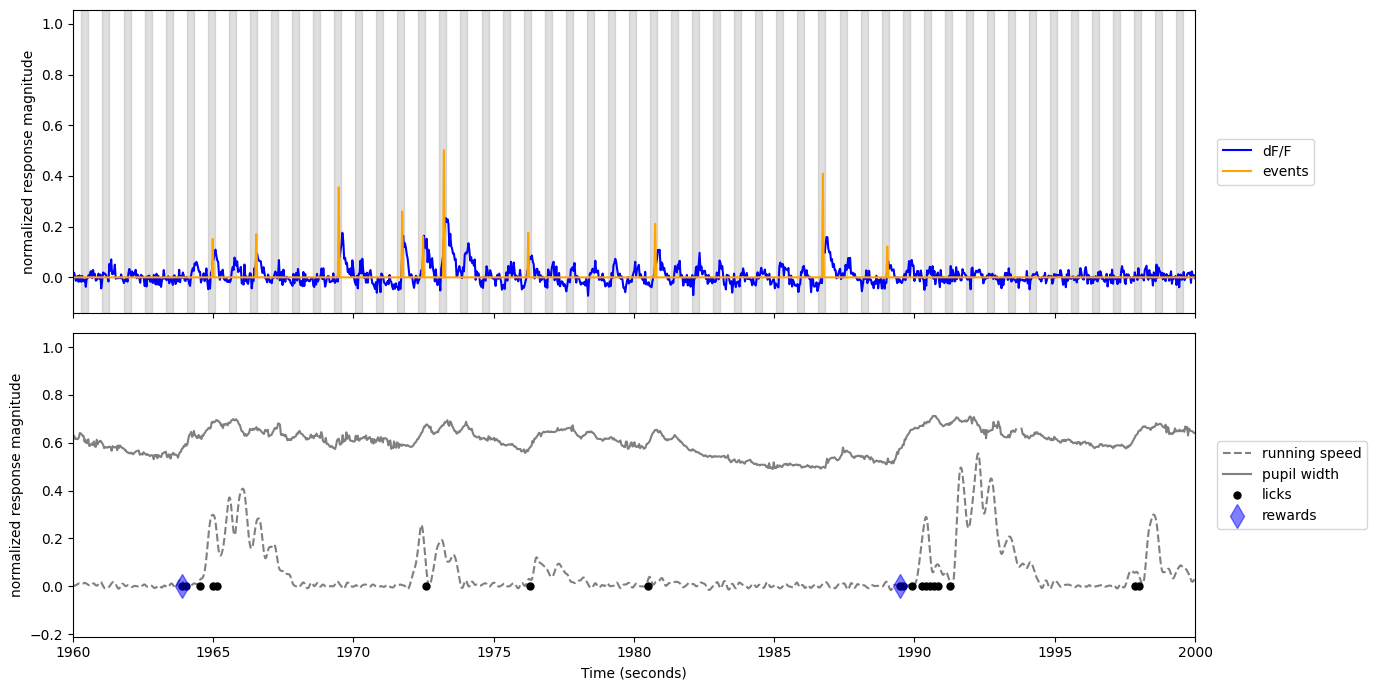

In [39]:
roi = 2
initial_time = 1960 
final_time = 2000

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 7), sharex=True)

# df/F and events with stimulus presentations 
ax1.plot(ophys_timestamps, 
         dff_traces.iloc[roi]['dff']/dff_traces.iloc[roi]['dff'].max(), 
         color='blue', label='dF/F')
ax1.plot(ophys_timestamps, 
         events.iloc[roi]['events']/events.iloc[roi]['events'].max()
         , color='orange', label='events')

for idx, stimulus in stimulus_table.iterrows():
    ax1.axvspan(stimulus['start_time'], stimulus['end_time'], color='gray', alpha=0.25)
ax1.set_ylabel('normalized response magnitude')
ax1.set_xlim([initial_time, final_time])
ax1.legend(
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0
)

# Behavior traces and events 
ax2.plot(
    ophys_experiment.running_speed.timestamps,
    ophys_experiment.running_speed.speed / ophys_experiment.running_speed.speed.max(), 
    '--', color = 'gray', label='running speed'
)
ax2.plot(
    ophys_experiment.eye_tracking.timestamps,
    ophys_experiment.eye_tracking.pupil_width / ophys_experiment.eye_tracking.pupil_width.max(), 
    color = 'gray',label='pupil width'
)
ax2.plot(
    ophys_experiment.licks.timestamps,
    np.zeros_like(ophys_experiment.licks.timestamps),
    marker='o', color='black', linestyle='none', markersize=5, label='licks'
)
ax2.plot(
    ophys_experiment.rewards.timestamps,
    np.zeros_like(ophys_experiment.rewards.timestamps),
    marker='d', color='blue', linestyle='none', markersize=12, alpha=0.5, label='rewards'
)
ax2.set_xlim([initial_time, final_time])
ax2.set_ylabel('normalized response magnitude')
ax2.set_xlabel('Time (seconds)')
ax2.legend(
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0
)

plt.tight_layout()
plt.subplots_adjust(right=0.8)
plt.show()

<div style="border-left: 3px solid #000; padding: 1px; padding-left: 10px; background: #F0FAFF; ">

**Summarize the dataset features:**

Now that we've shown how to use the AllenSDK to access the data and find different features of what is in the dataset and how it was collected, let's summarize what we've found. Attached is a Google sheet where we'll document key information about the datasets. Later on, we'll work on filling out the table as a class. 

[SWDB Dataset Features Spreadsheet](https://docs.google.com/spreadsheets/d/1zwqS97x81jEVUUMTLLtlk6NMMR2C7DhY9nJDB2BLvBE/edit?usp=sharing)

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

**Further exploration:** 
    
Try loading a different Brain Observatory dataset and identifying similar features of the data and projects. 


**Discussion:** 
    
Select a dataset and discuss: 
1. What interests you about the dataset? What are unique features that distinguish it from others? 
2. What are some scientific questions you could answer with this dataset? What are the next steps you would take to approach the question? 
2. Are there any limitations to consider or uncertainties to verify before working with this dataset? 
</div>